<a href="https://colab.research.google.com/github/schuylerdare96/ML-AI-Data-Science-Projects/blob/master/Dog%20_Breed_identification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

end to end dog breed identificaton project.

In [0]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import os
# import tensorflow_datasets as tfds
from IPython.display import Image

# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.experimental.TPUStrategy(resolver)


print("Hub version", hub.__version__)
print("tensorflow version",tf.__version__)

Hub version 0.8.0
tensorflow version 2.2.0-rc3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

#/content/drive/My Drive/Dog Vision/labels.csv
labels_csv=pd.read_csv("/content/drive/My Drive/Dog Vision/labels.csv")

labels_csv.head()
labels_csv.describe()


,id,breed
count,10222,10222
unique,10222,120
top,d763d3a2442894c122da5598ed6b7b7a,scottish_deerhound
freq,1,126


In [0]:
labels_csv.breed.value_counts

<bound method IndexOpsMixin.value_counts of 0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object>

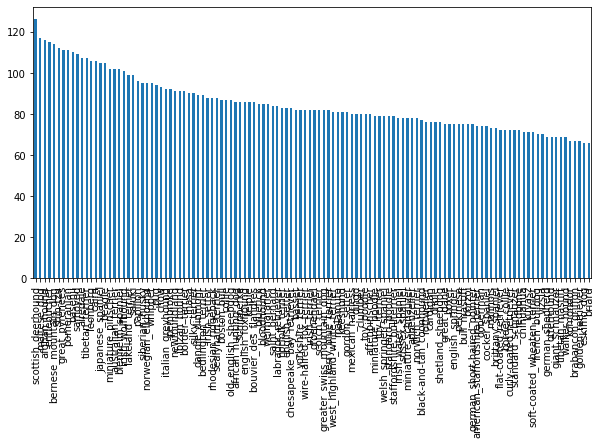

In [0]:
labels_csv["breed"].value_counts().plot.bar(figsize=(10,5));

In [0]:
labels_csv["breed"].value_counts().median()

82.0

In [0]:
# loops through labels_csv["id"], stores in fname
filename=["drive/My Drive/Dog Vision/train/"+ fname + ".jpg" for fname in labels_csv["id"]]

filename[:2]
print(filename[1])

drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg


In [0]:
import os
if len(os.listdir("drive/My Drive/Dog Vision/train")) == len(filename):
  print("All files have been imported successfully.")
else:
  print("Check again!")

All files have been imported successfully.


In [0]:
# creates an array of dog breeds.
labels=labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
labels=np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:

unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
boolean_labels=[label==unique_breeds for label in labels]


In [0]:
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[1].argmax())
print(boolean_labels[1].astype(int))



(array([19]),)
37
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Initially, a portion of the data is trained, then the whole data, since 10k imags takes a long time.

In [0]:
# Initially, a portion of the data is trained, then the whole data, since 10k imags takes a long time.
# variables for No of images used for training is written in caps

NUM_IMAGES=10222 #@param {type:"slider",min:1000,max:10222}
IMG_SIZE=224   #specifies size of image used by cnn; 244 default.
X=filename
y=boolean_labels

#param- magic function of colab

# splitting data into train & test splits

np.random.seed(69)


from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=0.2)


#turning images into tensors

from matplotlib.pyplot import imread
#imread=image read

image=imread(filename[20])
image.shape

#the above function creates a numpy array
#it has 2b converted into tensors(used by tensorflow)

tf.constant(image)

#writing a function to convert images into tensors.

def process_image(img_path):
  """
  This function obtains path of each image and converts it into functions. It performs the following steps
  1.Take an image filepath as input
  2.Use TensorFlow to read the file and save it to a variable, image
  3.Turn our image (a jpg) into Tensors
  4.Normalize our image (convert color channel values from from 0-255 to 0-1).
  5.Resize the image to be a shape of (224, 224)
  6.Return the modified image
  """

  #Step1
  image=tf.io.read_file(img_path)
  #Step2
  image=tf.image.decode_jpeg(image,channels=3)
  #channels specifies the spectrum in which it is to be decoded.
  #Step3
  image=tf.image.convert_image_dtype(image,tf.float32)
  #Step4
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  
  return image


#create a function to return a accept image and associated label and return a tuple.

def get_image_label(img_path,label):
  """
  Takes the image and associated label
  returns a tuple of type (image,label)
  """
  image=process_image(img_path)
  return (image,label)




In [0]:
#turn the data into batches.
# Define the batch size, 32 is a good start
BATCH_SIZE = 32 

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  #tf.constant converts the data into tensors.
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

     # Turn the training data into batches
    data_batch = data.batch(batch_size)
    
    return data_batch


#data.map()-sends data to the function(get_image_label) and returns the tuple and converts it into batches.


In [0]:
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [0]:
# Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
# create a function to visualise the training and testing images.

def show_25_images(images,labels):
  """"
  Shows 25 images with their labels.
  """
  plt.figure(figsize=(10,10))
  for i in range(25):
   
    #creating subplots(5,5)
    ax=plt.subplot(5,5,i+1) #(i+1)=index
    #Plotting the image
    ax=plt.imshow(images[i])
    #Adding image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn gridlines off
    plt.axis("off")



 


In [0]:
%%time
train_images, train_labels = next(train_data.as_numpy_iterator())
# next() returns the next item from an iterator; since train_data is in batch form, it needs to be converted into an iterator thus .as_numpy_iterator()
show_25_images(train_images, train_labels)

In [0]:

valid_images,valid_labels=next(val_data.as_numpy_iterator())
# next() returns the next item from an iterator; since val_data is in batch form, it needs to be converted into an iterator thus .as_numpy_iterator()
show_25_images(valid_images,valid_labels)

In [0]:
%%time
train_images, train_labels = next(train_data.as_numpy_iterator())
# next() returns the next item from an iterator; since train_data is in batch form, it needs to be converted into an iterator thus .as_numpy_iterator()
show_25_images(train_images, train_labels)

In [0]:
len(train_images),len(train_labels)

(32, 32)

In [0]:
# 3 parameters are required for building a NN model:
# 1. Input shape
# 2. Output shape(total number of unique samples)
# 3. URL of model imported.

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] #batch size, height, width, color channel

OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(model_url), # Layer 1 (input layer) -creates a keras layer on the pre-built layer
    tf.keras.layers.Dense(units=output_shape,   # converts the number of units to own output shape; default=1280 for present model
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), #loss is the mearure of how well model is predicting; higher the loss, worse is the prediction
      optimizer=tf.keras.optimizers.Adam(),  # optimizer improves the performance of algorithm
                                             # Adam-name of optimizer
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [0]:
model = create_model()
model.summary()

# 5432713 are the patterns our model has learnt from imagenet; we build our model on top of it.
# the model get trained from the dense layer of our model(120240).

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
%%time
#creating callbacks
#callbacks are functions that help us to perform specific tasks on the model(see current execution state, savie the model, stop training if the model isnt improving)

# 2 callbacks will be created for this model:
#1. Tensorbaord- see current state if model
#2. Stop execution if no imprivement is seen.

#1.

#3 steps are involved in this process..
#Load the TensorBoard notebook extension ✅
#Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
#Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
%load_ext tensorboard

import datetime

def create_tensorboard_callback():
  #create a log directory for storing logs
  logdir=os.path.join("/drive/My Drive/Dog Vision/logs",
                      # creating a datetime for storinng the log date
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # stores time in the specified format
  return tf.keras.callbacks.TensorBoard(logdir)


 #2. Step 2 is done beacuse if a model is oferfitted(trained too long) on a particular dataset, it becomes so effiecient on finding patterns in that dataset that it cant find patterns on another dataset.
 # So, attempt is made to prevent model from overfitting

                                                 
  # early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
  #                                                 patience=3)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)




CPU times: user 5.64 ms, sys: 0 ns, total: 5.64 ms
Wall time: 12.3 ms


In [0]:
%time

#1 epoch gives the model a single chance to look at all training data and figure out patterns;
#10 eopchs gives 100 chances to figure out patterns
#using epochs and callback; if model has'nt found any data for 3 consecutive rounds, the model will stop training.
#epoch is basically a round

NUM_EPOCHS=100 #@param {type:"slider",min:10,max:100,step:10}






CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, #this tell show many times model will be teste on validation data per epoch
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [0]:
# Fit the model to the data
 model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 2/25 [=>............................] - ETA: 5s - loss: 5.9518 - accuracy: 0.0000e+00WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.171996). Check your callbacks.


25/25 [==============================] - 5s 198ms/step - loss: 4.5776 - accuracy: 0.1075 - val_loss: 3.4308 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 4s 177ms/step - loss: 1.6258 - accuracy: 0.6950 - val_loss: 2.1145 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 4s 176ms/step - loss: 0.5581 - accuracy: 0.9362 - val_loss: 1.6016 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 4s 176ms/step - loss: 0.2411 - accuracy: 0.9887 - val_loss: 1.4536 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 4s 175ms/step - loss: 0.1426 - accuracy: 0.9975 - val_loss: 1.3917 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 4s 177ms/step - loss: 0.0989 - accuracy: 0.9987 - val_loss: 1.3403 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - 4s 176ms/step - loss: 0.0740 - accuracy: 0.9987 - val_loss: 1.3110 - val_accuracy: 0.6400
Epoch 8/100

In [0]:
# Analyzing tensorboard

%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs


In [0]:
# Making predictions
# Predict finds out the probability of each label for an image

predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 97s 14s/step


array([[2.37204768e-02, 3.47379572e-03, 1.29639041e-02, ...,
        3.39673972e-03, 2.39670975e-04, 1.07348058e-03],
       [2.73144022e-02, 1.31432468e-03, 1.65461704e-01, ...,
        8.60822350e-02, 3.43467022e-04, 3.00728972e-03],
       [2.60089952e-02, 1.74416900e-02, 2.33289991e-02, ...,
        4.80484497e-03, 1.01052597e-03, 2.47586472e-03],
       ...,
       [1.65390564e-04, 9.45289619e-03, 3.41496961e-05, ...,
        8.12907063e-04, 1.25547135e-02, 1.18486211e-02],
       [4.64834645e-03, 3.07001173e-03, 7.47513724e-04, ...,
        9.01489798e-03, 3.97304771e-03, 1.46167148e-02],
       [6.45919889e-03, 1.00268587e-03, 8.60503584e-04, ...,
        6.48630026e-04, 4.74495767e-03, 5.67936979e-04]], dtype=float32)

In [0]:

predictions.shape

(200, 120)

In [0]:
predictions[0]

In [0]:
# deciding predictions from images

index=69 #@param {type:"slider",min:0,max:122}
print(f"max probability of prediction",{np.max(predictions[index])})
print(f"Sum",{np.sum(predictions[index])})
print(f"Max index",{np.argmax(predictions[index])})
print(f"NAme of breed",{unique_breeds[np.argmax(predictions[index])]})

NameError: ignored

In [0]:
predictions[2]

In [0]:
def get_predicted_label(label_index):

  """
  Turns the predicted probabilties into the corresponding label.
  """
  return unique_breeds[np.argmax(label_index)]

get_predicted_label(predictions[0])

'borzoi'

In [0]:
# Since the validation dataset is in batched, it needs to be unbatchified to compare them with predicted labels and ananlyse the data.

#Creating a function to unbatchify the val_dataset
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  
  return images,labels



In [0]:
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.11465735, 0.1734809 , 0.28720638],
         [0.07201748, 0.13084102, 0.24456652],
         [0.08408824, 0.14291178, 0.25663728],
         ...,
         [0.5553551 , 0.54751194, 0.4886884 ],
         [0.5371499 , 0.542262  , 0.47892162],
         [0.54257715, 0.55434185, 0.48767513]],
 
        [[0.0795773 , 0.13840084, 0.25212634],
         [0.09113678, 0.14996031, 0.2636858 ],
         [0.12752102, 0.18634455, 0.30007002],
         ...,
         [0.55548847, 0.54764533, 0.48882183],
         [0.5543099 , 0.559422  , 0.49608168],
         [0.56017166, 0.57193637, 0.5052697 ]],
 
        [[0.08795277, 0.14677629, 0.2605018 ],
         [0.08097528, 0.13979882, 0.2535243 ],
         [0.11011904, 0.16894259, 0.28266805],
         ...,
         [0.57007873, 0.5622356 , 0.50341207],
         [0.5403274 , 0.54518175, 0.48197028],
         [0.54660374, 0.55667025, 0.49085265]],
 
        ...,
 
        [[0.81751794, 0.8332042 , 0.82928264],
         [0.8122311 , 0.8279174 , 0.82399

In [0]:
#visualizing the results

#The function will perform the following functions
#Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
#Convert the prediction probabilities to a predicted label. ✅
#Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

def plot_pred(pred_probabilities,labels,images,n=1):
  """"
  View probability label, actual label, and image for a sample n
  """

  pred_prob,true_label,image=pred_probabilities[n],labels[n],images[n]

  pred_label=get_predicted_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])#off since nothing is written inside it
  plt.yticks([])

  #change color based on predicted label and true label

  if (pred_label==true_label):
    color="green"
  else:
    color="red"

  #plotting
  plt.title("{} {:2.0f}% {}".format(pred_label,  #{:2.0f}%-rounds the value to 2 decimal places
                                   np.max(pred_prob)*100,
                                   true_label),
                                   color=color
                                   )


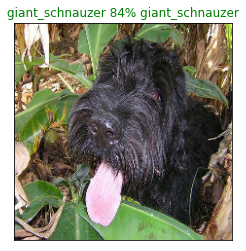

In [0]:
plot_pred(pred_probabilities=predictions,
           labels=val_labels,
           images=val_images,
           n=24)


In [0]:
# Make a function to select top 10 predictions.

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_predicted_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass



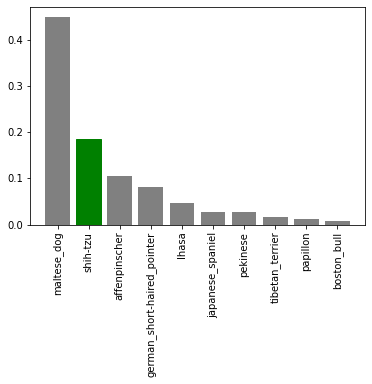

In [0]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=34)

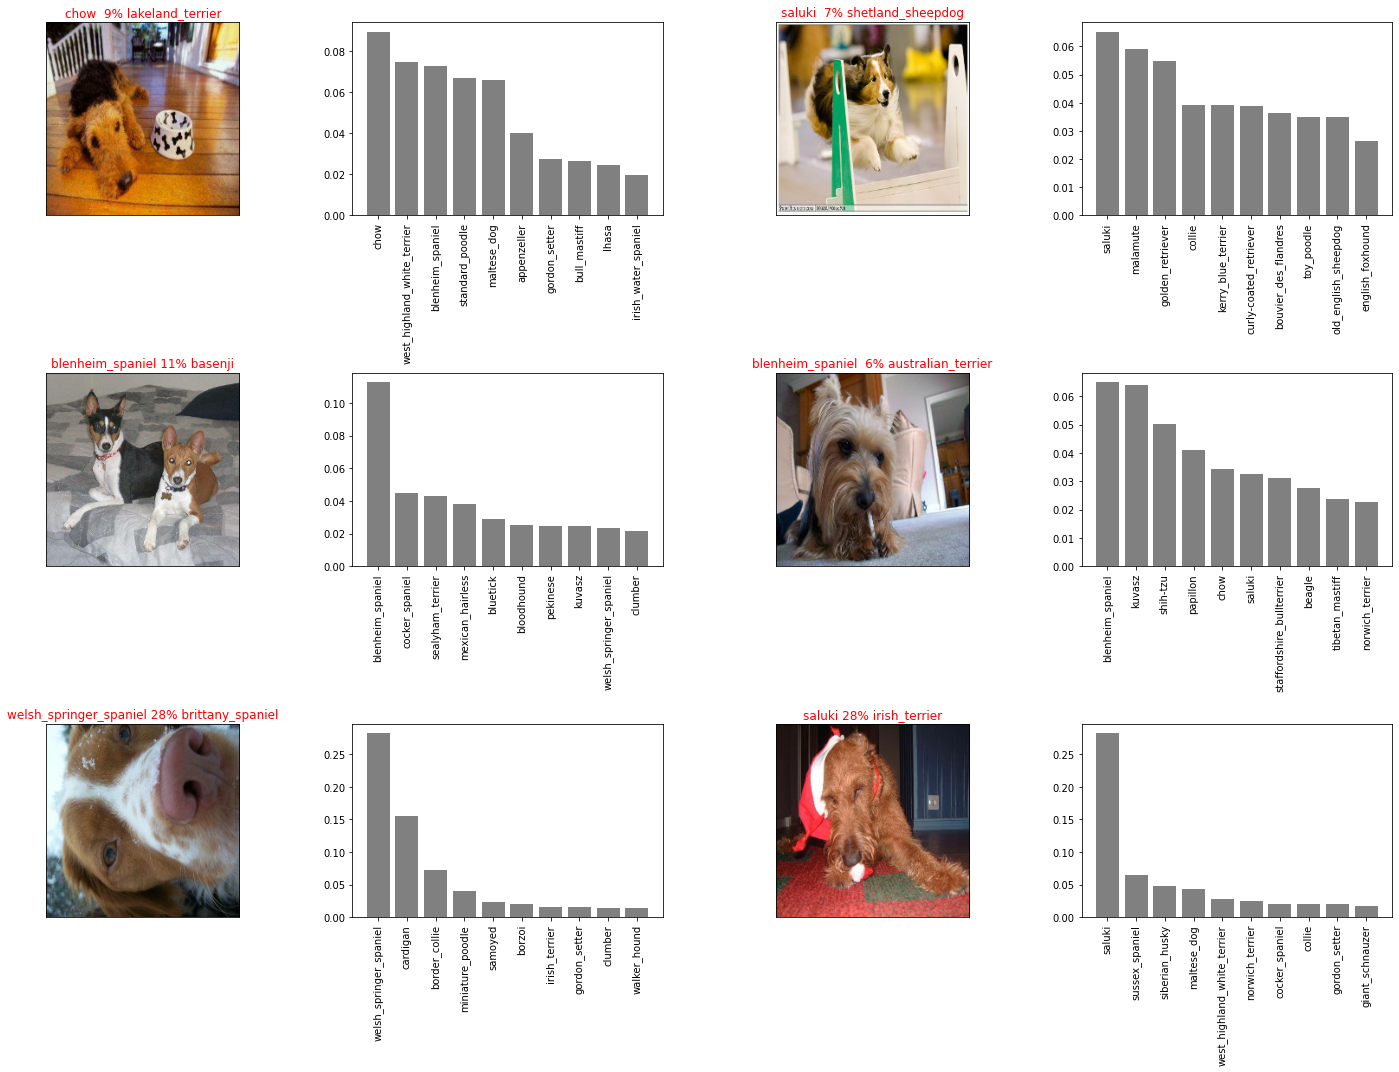

In [0]:
# Let's check out a few predictions and their different values
i_multiplier = 100 #@param {type:"slider",min:1,max:100}
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(pred_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [0]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
def load_model(model_path):
  """
  LOads the model from the specified path
  """
  print(f"loading saved model from ...{model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer}) # we are using our own leras model rather then the default one.

  return model

In [0]:
save_model(model,suffix="trained on 1000 images; model used : mobilenetv2") #suffix is used to desribe the properties of model

Saving model to: drive/My Drive/Dog Vision/models/20200503-18521588531942-trained on 1000 images; model used : mobilenetv2.h5...


'drive/My Drive/Dog Vision/models/20200503-18521588531942-trained on 1000 images; model used : mobilenetv2.h5'

In [0]:
load_1000_image_model=load_model("drive/My Drive/Dog Vision/models/20200503-16311588523490-trained on 1000 images; model used : mobilenetv2.h5")

loading saved model from ...drive/My Drive/Dog Vision/models/20200503-16311588523490-trained on 1000 images; model used : mobilenetv2.h5


In [0]:
model.evaluate(val_data)

7/7 [==============================] - 1s 97ms/step - loss: 1.2287 - accuracy: 0.6500


[1.2286916971206665, 0.6499999761581421]

In [0]:
load_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 139ms/step - loss: 1.2287 - accuracy: 0.6500


[1.2286919355392456, 0.6499999761581421]

In [0]:
# Training the model with 10k images.

full_data = create_data_batches(X, y)
full_data



Creating training data batches...


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
%%time
# Create full model callbacks
import os
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

CPU times: user 36.2 ms, sys: 59.9 ms, total: 96.1 ms
Wall time: 203 ms


In [0]:
%%time
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 6004s 19s/step - loss: 1.3495 - accuracy: 0.6705
Epoch 2/100
320/320 [==============================] - 73s 227ms/step - loss: 0.4002 - accuracy: 0.8827
Epoch 3/100
320/320 [==============================] - 72s 226ms/step - loss: 0.2345 - accuracy: 0.9377
Epoch 4/100
320/320 [==============================] - 73s 228ms/step - loss: 0.1517 - accuracy: 0.9645
Epoch 5/100
320/320 [==============================] - 69s 214ms/step - loss: 0.1054 - accuracy: 0.9799
Epoch 6/100
320/320 [==============================] - 67s 208ms/step - loss: 0.0771 - accuracy: 0.9856
Epoch 7/100
320/320 [==============================] - 74s 232ms/step - loss: 0.0608 - accuracy: 0.9895
Epoch 8/100
320/320 [==============================] - 74s 230ms/step - loss: 0.0453 - accuracy: 0.9958
Epoch 9/100
320/320 [==============================] - 75s 234ms/step - loss: 0.0371 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 73s 229m

In [0]:
save_model(full_model,suffix="Create the model for 10k images")

Saving model to: drive/My Drive/Dog Vision/models/20200504-09521588585958-Create the model for 10k images.h5...


'drive/My Drive/Dog Vision/models/20200504-09521588585958-Create the model for 10k images.h5'

In [0]:
loaded_full_model=load_model("drive/My Drive/Dog Vision/models/20200504-09521588585958-Create the model for 10k images.h5")

loading saved model from ...drive/My Drive/Dog Vision/models/20200504-09521588585958-Create the model for 10k images.h5


In [0]:
len(X),len(y)

(10222, 10222)

**Making predictions on the test dataset**

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

Get the test image filenames. ✅
Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
Make a predictions array by passing the test batches to the predict() method called on our model.

In [0]:
#retrieving the test images
import os
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)] #loops through the etst folder and appends theimage name to test path
test_filenames[:10]

['drive/My Drive/Dog Vision/test/f2e4e4f1ab9d156443682dc4653f23e5.jpg',
 'drive/My Drive/Dog Vision/test/e9bcd763afd5e192fc047267c0b3cacd.jpg',
 'drive/My Drive/Dog Vision/test/e870a3586332ab83ddd5821fbc882f42.jpg',
 'drive/My Drive/Dog Vision/test/f1ba2c4a69ed34fea976f8fc6b77f45b.jpg',
 'drive/My Drive/Dog Vision/test/f24c3d9735880ef6ea736dc549419771.jpg',
 'drive/My Drive/Dog Vision/test/eb9aebedf9ed7d768a5afb36cd0e2436.jpg',
 'drive/My Drive/Dog Vision/test/ef4b59cdb6485917a71f2c40df9c8d47.jpg',
 'drive/My Drive/Dog Vision/test/e8f100fcc80e9c987999a1ace2d18bc3.jpg',
 'drive/My Drive/Dog Vision/test/ede0dddd46a46f8f6467b7fbd1b4958a.jpg',
 'drive/My Drive/Dog Vision/test/f00d734eff06f3a77fcc629402a95597.jpg']

In [0]:
# Create test data batches

test_data=create_data_batches(test_filenames,test_data=True)

NameError: ignored

In [0]:
len(test_filenames)

10357

In [0]:
# Making predictions on the test data batch
# This is gonna take a long time

test_predictions=loaded_full_model.predict(test_data,
                                           verbose=1)

324/324 [==============================] - 6198s 19s/step


In [0]:
# the predicted results can be saved into a csv file that can be loaded later:
# delimiter= representation of separation in a document i.e. , . , ; etc
# 1. Save predicted values

np.savetxt("drive/My Drive/Dog Vision/predicted_array_final.csv",test_predictions,delimiter=",")

# 2. Load a predicted file

#test_predictions=np.loadtxt("drive/My Drive/Dog Vision/predicted_array_final.csv",delimiter=",")


In [0]:
#loading the saved model
test_predictions=np.loadtxt("drive/My Drive/Dog Vision/predicted_array_final.csv",delimiter=",")


In [0]:
test_predictions.shape

(10357, 120)

In [0]:
list(unique_breeds)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

1.Create a pandas DataFrame with an ID column as well as a column for each dog breed. ✅
2.Add data to the ID column by extracting the test image ID's from their filepaths.
3.Add data (the prediction probabilites) to each of the dog breed columns.
4.Export the DataFrame as a CSV to submit it to Kaggle.


In [0]:
#testing out the steps.
["id"] + list(unique_breeds)

In [0]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)] # prints only the ids of each image
preds_df["id"] = test_ids

# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f2e4e4f1ab9d156443682dc4653f23e5,1.03034e-07,1.4136e-07,0.000296197,5.78905e-10,2.9579e-08,6.92231e-06,2.4588e-05,4.44359e-06,4.78197e-10,2.52898e-10,1.82705e-10,5.12205e-06,1.65316e-08,5.54883e-10,3.17946e-09,2.39039e-07,0.0692551,3.3388e-08,1.07627e-06,5.57683e-06,9.66108e-10,8.60038e-12,1.29381e-09,2.44494e-07,2.74748e-08,2.52197e-09,2.45931e-06,0.261658,3.91295e-08,1.12247e-05,4.121e-08,8.49084e-08,4.98304e-07,0.320606,1.57552e-08,6.82456e-09,0.000242729,6.64307e-07,1.09604e-09,...,1.09198e-05,1.96118e-06,1.23746e-07,1.98012e-08,3.05113e-05,1.95836e-08,0.000399786,1.14689e-06,9.62675e-09,1.6685e-05,7.46222e-09,5.58301e-10,2.82918e-09,6.37555e-08,3.04766e-06,0.125467,7.35452e-06,9.57305e-08,1.06377e-11,8.24334e-06,1.41934e-07,1.31314e-05,2.11884e-08,2.908e-10,8.78904e-05,5.29102e-07,7.94109e-09,2.09785e-09,6.99684e-08,3.07892e-06,5.46585e-11,4.20696e-08,2.52851e-08,1.0915e-07,6.22193e-08,1.48241e-08,8.40228e-06,2.74961e-07,4.06001e-06,7.86801e-10
1,e9bcd763afd5e192fc047267c0b3cacd,2.30897e-08,2.38421e-11,3.37159e-11,1.40255e-08,1.17231e-09,6.69243e-09,1.15676e-07,1.88306e-11,1.88995e-11,2.36563e-11,8.6985e-12,6.8427e-10,2.88376e-11,1.61288e-10,3.40583e-09,3.08436e-10,3.47341e-09,4.27883e-06,2.45941e-08,4.00711e-11,1.5001e-11,1.32332e-13,3.7477e-08,8.95837e-09,1.64892e-07,2.64256e-10,1.31871e-08,9.36357e-10,3.63111e-09,6.98009e-10,4.41719e-10,6.65657e-11,9.16244e-11,1.00425e-09,3.73547e-12,1.40784e-09,5.93932e-07,8.72348e-10,9.62329e-12,...,3.63117e-13,1.81064e-05,4.21542e-13,8.13426e-07,4.43266e-10,5.01116e-10,1.07103e-08,6.07504e-11,7.92824e-11,2.87348e-10,1.48493e-09,2.1272e-12,9.82496e-13,9.38672e-12,3.82518e-11,1.04242e-09,9.66615e-09,0.000433763,1.44377e-07,6.73732e-12,2.36107e-09,1.85932e-11,6.40068e-08,4.52556e-08,1.0681e-09,9.88639e-10,3.94376e-07,5.58385e-09,4.04479e-13,9.85773e-14,1.93209e-11,3.2507e-10,7.92151e-08,1.62037e-10,1.86981e-11,3.5117e-10,1.66638e-11,9.27814e-08,2.82791e-05,1.34846e-09
2,e870a3586332ab83ddd5821fbc882f42,6.84851e-15,1.51484e-07,2.12096e-13,3.0644e-11,1.66543e-11,7.6383e-12,7.3248e-11,2.4955e-14,9.32393e-13,1.17038e-12,3.09335e-13,4.92494e-11,4.15185e-12,8.8157e-09,2.78619e-11,3.82576e-08,2.04043e-10,2.688e-13,2.63363e-12,8.5381e-14,2.37468e-14,4.25101e-15,1.00681e-15,1.98989e-10,3.89699e-13,1.6143e-12,1.09968e-13,1.02169e-12,8.26031e-12,3.79475e-12,6.63157e-10,1.54917e-09,0.857012,1.52171e-09,1.28786e-11,5.71091e-09,1.17125e-12,8.60032e-15,1.01011e-15,...,9.99929e-15,2.9568e-12,8.2244e-12,1.3357e-07,8.05251e-12,3.68364e-11,1.0176e-10,4.42922e-09,4.81528e-12,4.87432e-11,1.12936e-13,7.03468e-11,8.63643e-11,3.76377e-06,5.84751e-12,4.13459e-15,1.74473e-12,2.40843e-12,1.44768e-14,1.53453e-11,4.45378e-11,1.51422e-12,7.64926e-12,5.76236e-12,8.18731e-13,4.086e-11,8.43052e-11,1.86655e-08,2.02387e-09,6.32923e-10,2.55958e-12,3.20208e-14,5.24085e-14,3.18266e-10,5.572e-10,4.01242e-11,8.04539e-12,9.71377e-12,3.5

In [0]:
preds_df.head()

In [0]:

os.path.splitext(test_filenames[1])


('drive/My Drive/Dog Vision/test/e9bcd763afd5e192fc047267c0b3cacd', '.jpg')

In [0]:
## Making prediction on our own images
#this feature requires custom imags to be loaded into the 'my-dog-photos'

custom_path = "drive/My Drive/Dog Vision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

# Turn custom images into batch datasets 
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels


# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)


